<a href="https://colab.research.google.com/github/claireskim02/PER_and_indexes/blob/main/bollinger_per.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.api as sm
%matplotlib inline

In [ ]:
spx = pd.read_csv("spx1.csv")
spx

,Date,SPX Index - 현재가,SMAVG (50),SMAVG (100),SMAVG (200),BEst PER (L1)
0,2024-07-09,NaN,NaN,NaN,NaN,23.0790
1,2024-07-08,5572.85,5320.48,5220.46,4892.79,23.0790
2,2024-07-05,5567.19,5310.46,5214.95,4887.15,23.0490
3,2024-07-04,NaN,NaN,NaN,NaN,22.9283
4,2024-07-03,5537.02,5300.52,5209.54,4881.58,22.9301
...,...,...,...,...,...,...
457,2022-10-07,3639.66,NaN,NaN,NaN,16.3927
458,2022-10-06,3744.52,NaN,NaN,NaN,16.8560
459,2022-10-05,3783.28,NaN,NaN,NaN,17.0339
460,2022-10-04,3790.93,NaN,NaN,NaN,17.0643


In [ ]:
spx["Date"] = pd.to_datetime(spx["Date"])
spx.set_index("Date", inplace = True)
spx.sort_index(inplace=True)
spx

,SPX Index - 현재가,SMAVG (50),SMAVG (100),SMAVG (200),BEst PER (L1)
Date,,,,,
2022-10-03,3678.43,NaN,NaN,NaN,16.5585
2022-10-04,3790.93,NaN,NaN,NaN,17.0643
2022-10-05,3783.28,NaN,NaN,NaN,17.0339
2022-10-06,3744.52,NaN,NaN,NaN,16.8560
2022-10-07,3639.66,NaN,NaN,NaN,16.3927
...,...,...,...,...,...
2024-07-03,5537.02,5300.52,5209.54,4881.58,22.9301
2024-07-04,NaN,NaN,NaN,NaN,22.9283
2024-07-05,5567.19,5310.46,5214.95,4887.15,23.0490


In [ ]:
spx = spx.dropna()
spx

,SPX Index - 현재가,SMAVG (50),SMAVG (100),SMAVG (200),BEst PER (L1)
Date,,,,,
2023-07-20,4534.87,4319.65,4182.33,4048.41,21.1322
2023-07-21,4536.34,4327.99,4187.88,4052.70,21.1400
2023-07-24,4554.64,4336.33,4193.72,4056.52,21.2444
2023-07-25,4567.46,4345.07,4199.88,4060.44,21.2746
2023-07-26,4566.75,4353.92,4205.74,4064.55,21.2420
...,...,...,...,...,...
2024-07-01,5475.09,5279.16,5199.01,4871.13,22.6673
2024-07-02,5509.01,5290.00,5204.15,4876.15,22.8116
2024-07-03,5537.02,5300.52,5209.54,4881.58,22.9301


In [ ]:
spx = spx.iloc[:,[0,-1]]
spx

,SPX Index - 현재가,BEst PER (L1)
Date,,
2023-07-20,4534.87,21.1322
2023-07-21,4536.34,21.1400
2023-07-24,4554.64,21.2444
2023-07-25,4567.46,21.2746
2023-07-26,4566.75,21.2420
...,...,...
2024-07-01,5475.09,22.6673
2024-07-02,5509.01,22.8116
2024-07-03,5537.02,22.9301


In [ ]:
new = ["Current_Price", "PER"]
spx.columns = new
spx

,Current_Price,PER
Date,,
2023-07-20,4534.87,21.1322
2023-07-21,4536.34,21.1400
2023-07-24,4554.64,21.2444
2023-07-25,4567.46,21.2746
2023-07-26,4566.75,21.2420
...,...,...
2024-07-01,5475.09,22.6673
2024-07-02,5509.01,22.8116
2024-07-03,5537.02,22.9301


In [ ]:
spx['sma_20'] = spx['PER'].rolling(window=20).mean()
spx['std_20'] = spx['PER'].rolling(window = 20).std()
spx['lower_1'] = spx['sma_20'] - spx['std_20']
spx['upper_1'] = spx['sma_20'] + spx['std_20']
spx['upper_2'] = spx['sma_20'] + 2*spx['std_20']
spx['lower_2'] = spx['sma_20'] - 2*spx['std_20']
spx

,Current_Price,PER,sma_20,std_20,lower_1,upper_1,upper_2,lower_2
Date,,,,,,,,
2023-07-20,4534.87,21.1322,NaN,NaN,NaN,NaN,NaN,NaN
2023-07-21,4536.34,21.1400,NaN,NaN,NaN,NaN,NaN,NaN
2023-07-24,4554.64,21.2444,NaN,NaN,NaN,NaN,NaN,NaN
2023-07-25,4567.46,21.2746,NaN,NaN,NaN,NaN,NaN,NaN
2023-07-26,4566.75,21.2420,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
2024-07-01,5475.09,22.6673,22.417670,0.280773,22.136897,22.698443,22.979217,21.856123
2024-07-02,5509.01,22.8116,22.465680,0.260188,22.205492,22.725868,22.986057,21.945303
2024-07-03,5537.02,22.9301,22.518000,0.241541,22.276459,22.759541,23.001082,22.034918


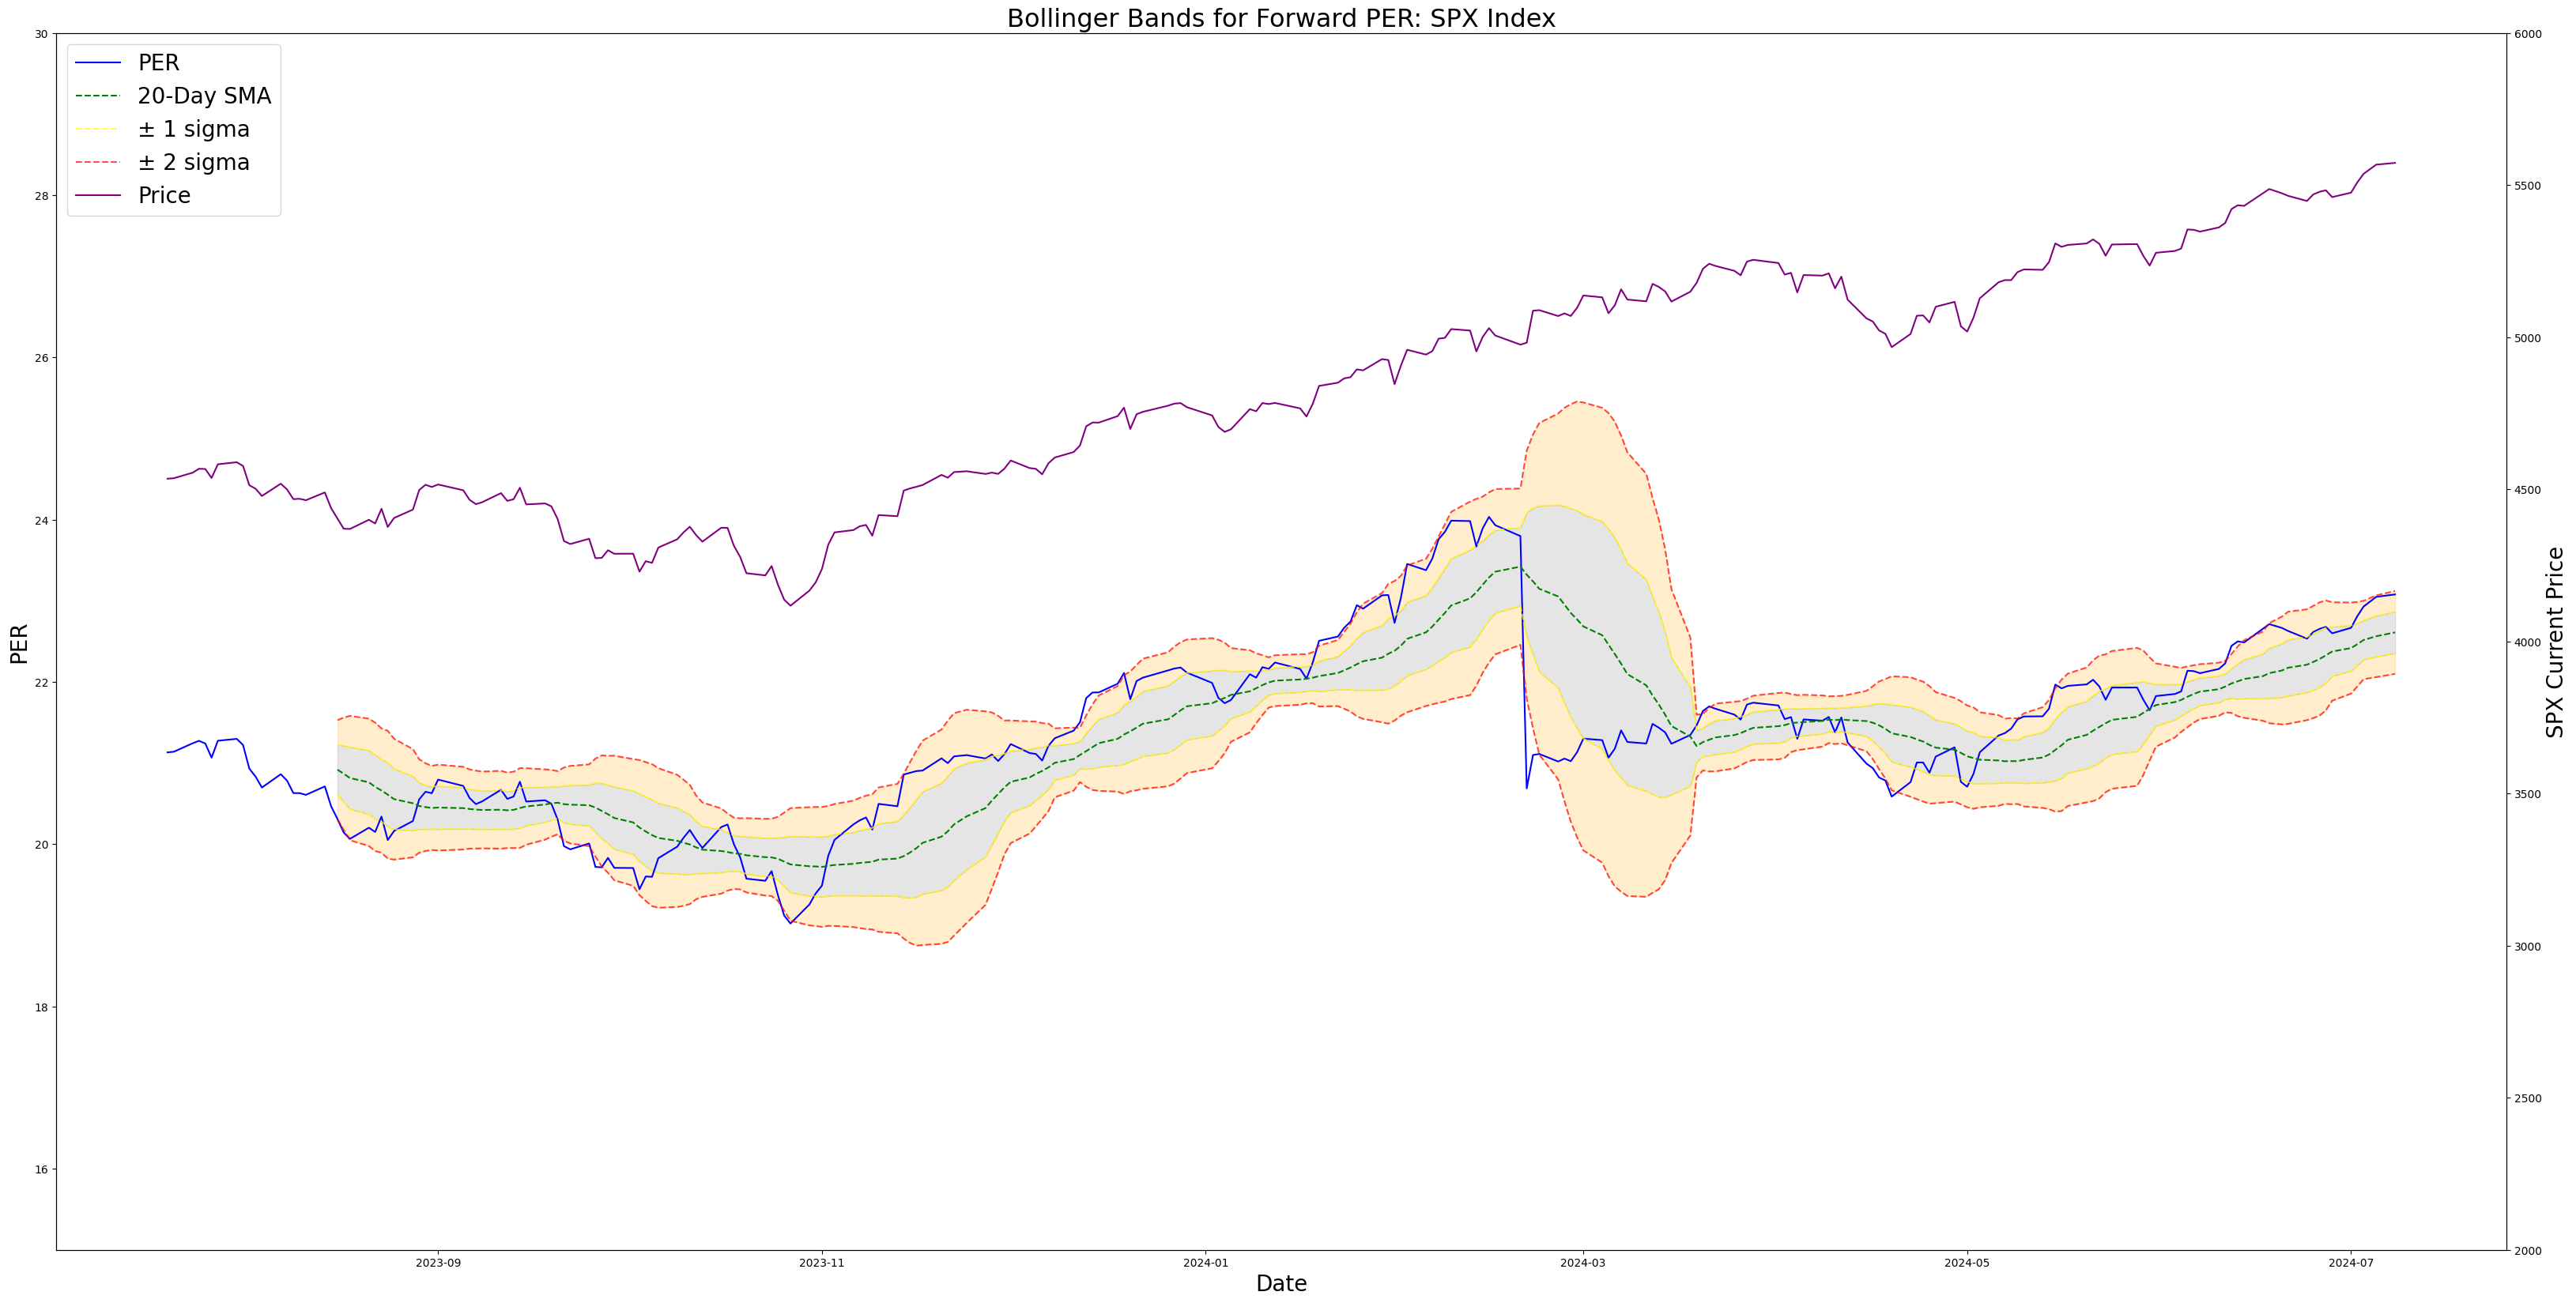

In [ ]:
fig, ax1 = plt.subplots(figsize = (40,20))

ax1.plot(spx.index, spx['PER'], label = 'PER', color = 'blue')
ax1.plot(spx.index, spx['sma_20'], label = '20-Day SMA', color = 'green', linestyle='--')
ax1.plot (spx.index, spx['upper_1'], label = '\u00B1 1 sigma', linestyle = '--', color='yellow', alpha=0.7)
ax1.plot (spx.index, spx['upper_2'], label = '\u00B1 2 sigma', linestyle = '--', color='red', alpha=0.7)
ax1.plot (spx.index, spx['lower_1'], linestyle = '--', color='yellow', alpha=0.7)
ax1.plot (spx.index, spx['lower_2'], linestyle = '--', color='red', alpha=0.7)
ax1.fill_between(spx.index, spx['upper_1'], spx['lower_1'], color='gray', alpha = 0.2)
ax1.fill_between(spx.index, spx['upper_2'], spx['upper_1'], color = 'orange', alpha=0.2)
ax1.fill_between(spx.index, spx['lower_2'], spx['lower_1'], color = 'orange', alpha=0.2)

ax1.set_xlabel('Date', fontsize = 20)
ax1.set_ylabel('PER', fontsize = 20)
ax1.set_title('Bollinger Bands for Forward PER: SPX Index', fontsize = 23)

ax2 = ax1.twinx()
ax2.plot(spx.index, spx['Current_Price'], label='Price', color = 'purple')
ax2.set_ylabel('SPX Current Price', fontsize = 20)

ax1.set_ylim(15,30)
ax2.set_ylim(2000,6000)

lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
ax1.legend(lines_1 + lines_2, labels_1+labels_2, loc='upper left', fontsize=20)

plt.show()

In [ ]:
#이상날짜
too_high = spx.loc[spx["PER"]>=spx["upper_2"]]
too_high

,Current_Price,PER,sma_20,std_20,lower_1,upper_1,upper_2,lower_2
Date,,,,,,,,
2023-12-12,4643.70,21.5020,21.100585,0.167452,20.933133,21.268037,21.435489,20.765681
2023-12-13,4707.09,21.8015,21.147710,0.220199,20.927511,21.367909,21.588109,20.707311
2023-12-14,4719.55,21.8704,21.197195,0.263906,20.933289,21.461101,21.725007,20.669383
2023-12-15,4719.19,21.8714,21.245690,0.294096,20.951594,21.539786,21.833883,20.657497
2023-12-18,4740.56,21.9786,21.299215,0.325192,20.974023,21.624407,21.949600,20.648830
2023-12-19,4768.37,22.1109,21.351825,0.366698,20.985127,21.718523,22.085221,20.618429
2024-01-19,4839.81,22.5072,22.072185,0.186998,21.885187,22.259183,22.446181,21.698189
2024-01-22,4850.43,22.5604,22.110845,0.204121,21.906724,22.314966,22.519087,21.702603
2024-01-23,4864.60,22.6684,22.143695,0.237425,21.906270,22.381120,22.618544,21.668846


In [ ]:
too_low = spx.loc[spx["PER"]<=spx["lower_2"]]
too_low

,Current_Price,PER,sma_20,std_20,lower_1,upper_1,upper_2,lower_2
Date,,,,,,,,
2023-08-17,4370.36,20.1441,20.868965,0.346239,20.522726,21.215204,21.561444,20.176486
2023-09-21,4330.00,19.9767,20.493630,0.225994,20.267636,20.719624,20.945618,20.041642
2023-09-22,4320.06,19.9367,20.487890,0.238904,20.248986,20.726794,20.965697,20.010083
2023-09-26,4273.53,19.7202,20.451900,0.301822,20.150078,20.753722,21.055544,19.848256
2023-09-27,4274.51,19.7149,20.409975,0.342479,20.067496,20.752454,21.094933,19.725017
2023-10-26,4137.23,19.1204,19.785190,0.302410,19.482780,20.087600,20.390011,19.180369
2023-10-27,4117.37,19.0223,19.750875,0.347182,19.403693,20.098057,20.445239,19.056511
2024-02-21,4981.80,20.6878,23.322370,0.764939,22.557431,24.087309,24.852249,21.792491
2024-02-22,5087.03,21.0998,23.240150,0.905767,22.334383,24.145917,25.051683,21.428617


In [ ]:
cape = pd.read_csv("smpcape.csv")
cape["Date"] = pd.to_datetime(cape["Date"])
cape.set_index("Date", inplace = True)
cape

,SPX Index - 현재가,SMAVG (50),CAPE
Date,,,
2024-07-08,NaN,NaN,NaN
2024-07-05,5567.19,5310.46,33.89
2024-07-04,NaN,NaN,33.76
2024-07-03,5537.02,5300.52,33.76
2024-07-02,5509.01,5290.00,33.58
...,...,...,...
2023-05-05,4136.25,NaN,27.05
2023-05-04,4061.22,NaN,26.57
2023-05-03,4090.75,NaN,26.74


In [ ]:
cape = cape.iloc[:,[0,-1]]
cape

,SPX Index - 현재가,CAPE
Date,,
2024-07-08,NaN,NaN
2024-07-05,5567.19,33.89
2024-07-04,NaN,33.76
2024-07-03,5537.02,33.76
2024-07-02,5509.01,33.58
...,...,...
2023-05-05,4136.25,27.05
2023-05-04,4061.22,26.57
2023-05-03,4090.75,26.74


In [ ]:
column = ["Current_Price","CAPE"]
cape.columns = column
cape

,Current_Price,CAPE
Date,,
2024-07-08,NaN,NaN
2024-07-05,5567.19,33.89
2024-07-04,NaN,33.76
2024-07-03,5537.02,33.76
2024-07-02,5509.01,33.58
...,...,...
2023-05-05,4136.25,27.05
2023-05-04,4061.22,26.57
2023-05-03,4090.75,26.74


In [ ]:
cape = cape.dropna()
cape

,Current_Price,CAPE
Date,,
2024-07-05,5567.19,33.89
2024-07-03,5537.02,33.76
2024-07-02,5509.01,33.58
2024-07-01,5475.09,33.38
2024-06-28,5460.48,33.28
...,...,...
2023-05-05,4136.25,27.05
2023-05-04,4061.22,26.57
2023-05-03,4090.75,26.74


In [ ]:
cape.sort_index(inplace = True)
cape

<ipython-input-31-ee74ec5482a4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cape.sort_index(inplace = True)


,Current_Price,CAPE
Date,,
2023-05-01,4167.87,27.25
2023-05-02,4119.58,26.93
2023-05-03,4090.75,26.74
2023-05-04,4061.22,26.57
2023-05-05,4136.25,27.05
...,...,...
2024-06-28,5460.48,33.28
2024-07-01,5475.09,33.38
2024-07-02,5509.01,33.58


In [ ]:
cape['sma_20'] = cape['CAPE'].rolling(window=20).mean()
cape['std_20'] = cape['CAPE'].rolling(window = 20).std()
cape['lower_1'] = cape['sma_20'] - cape['std_20']
cape['upper_1'] = cape['sma_20'] + cape['std_20']
cape['upper_2'] = cape['sma_20'] + 2*cape['std_20']
cape['lower_2'] = cape['sma_20'] - 2*cape['std_20']
cape

<ipython-input-32-2e285246cad1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cape['sma_20'] = cape['CAPE'].rolling(window=20).mean()
<ipython-input-32-2e285246cad1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cape['std_20'] = cape['CAPE'].rolling(window = 20).std()
<ipython-input-32-2e285246cad1>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.

,Current_Price,CAPE,sma_20,std_20,lower_1,upper_1,upper_2,lower_2
Date,,,,,,,,
2023-05-01,4167.87,27.25,NaN,NaN,NaN,NaN,NaN,NaN
2023-05-02,4119.58,26.93,NaN,NaN,NaN,NaN,NaN,NaN
2023-05-03,4090.75,26.74,NaN,NaN,NaN,NaN,NaN,NaN
2023-05-04,4061.22,26.57,NaN,NaN,NaN,NaN,NaN,NaN
2023-05-05,4136.25,27.05,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
2024-06-28,5460.48,33.28,32.9245,0.446430,32.478070,33.370930,33.817360,32.031640
2024-07-01,5475.09,33.38,32.9870,0.415795,32.571205,33.402795,33.818589,32.155411
2024-07-02,5509.01,33.58,33.0585,0.386186,32.672314,33.444686,33.830872,32.286128


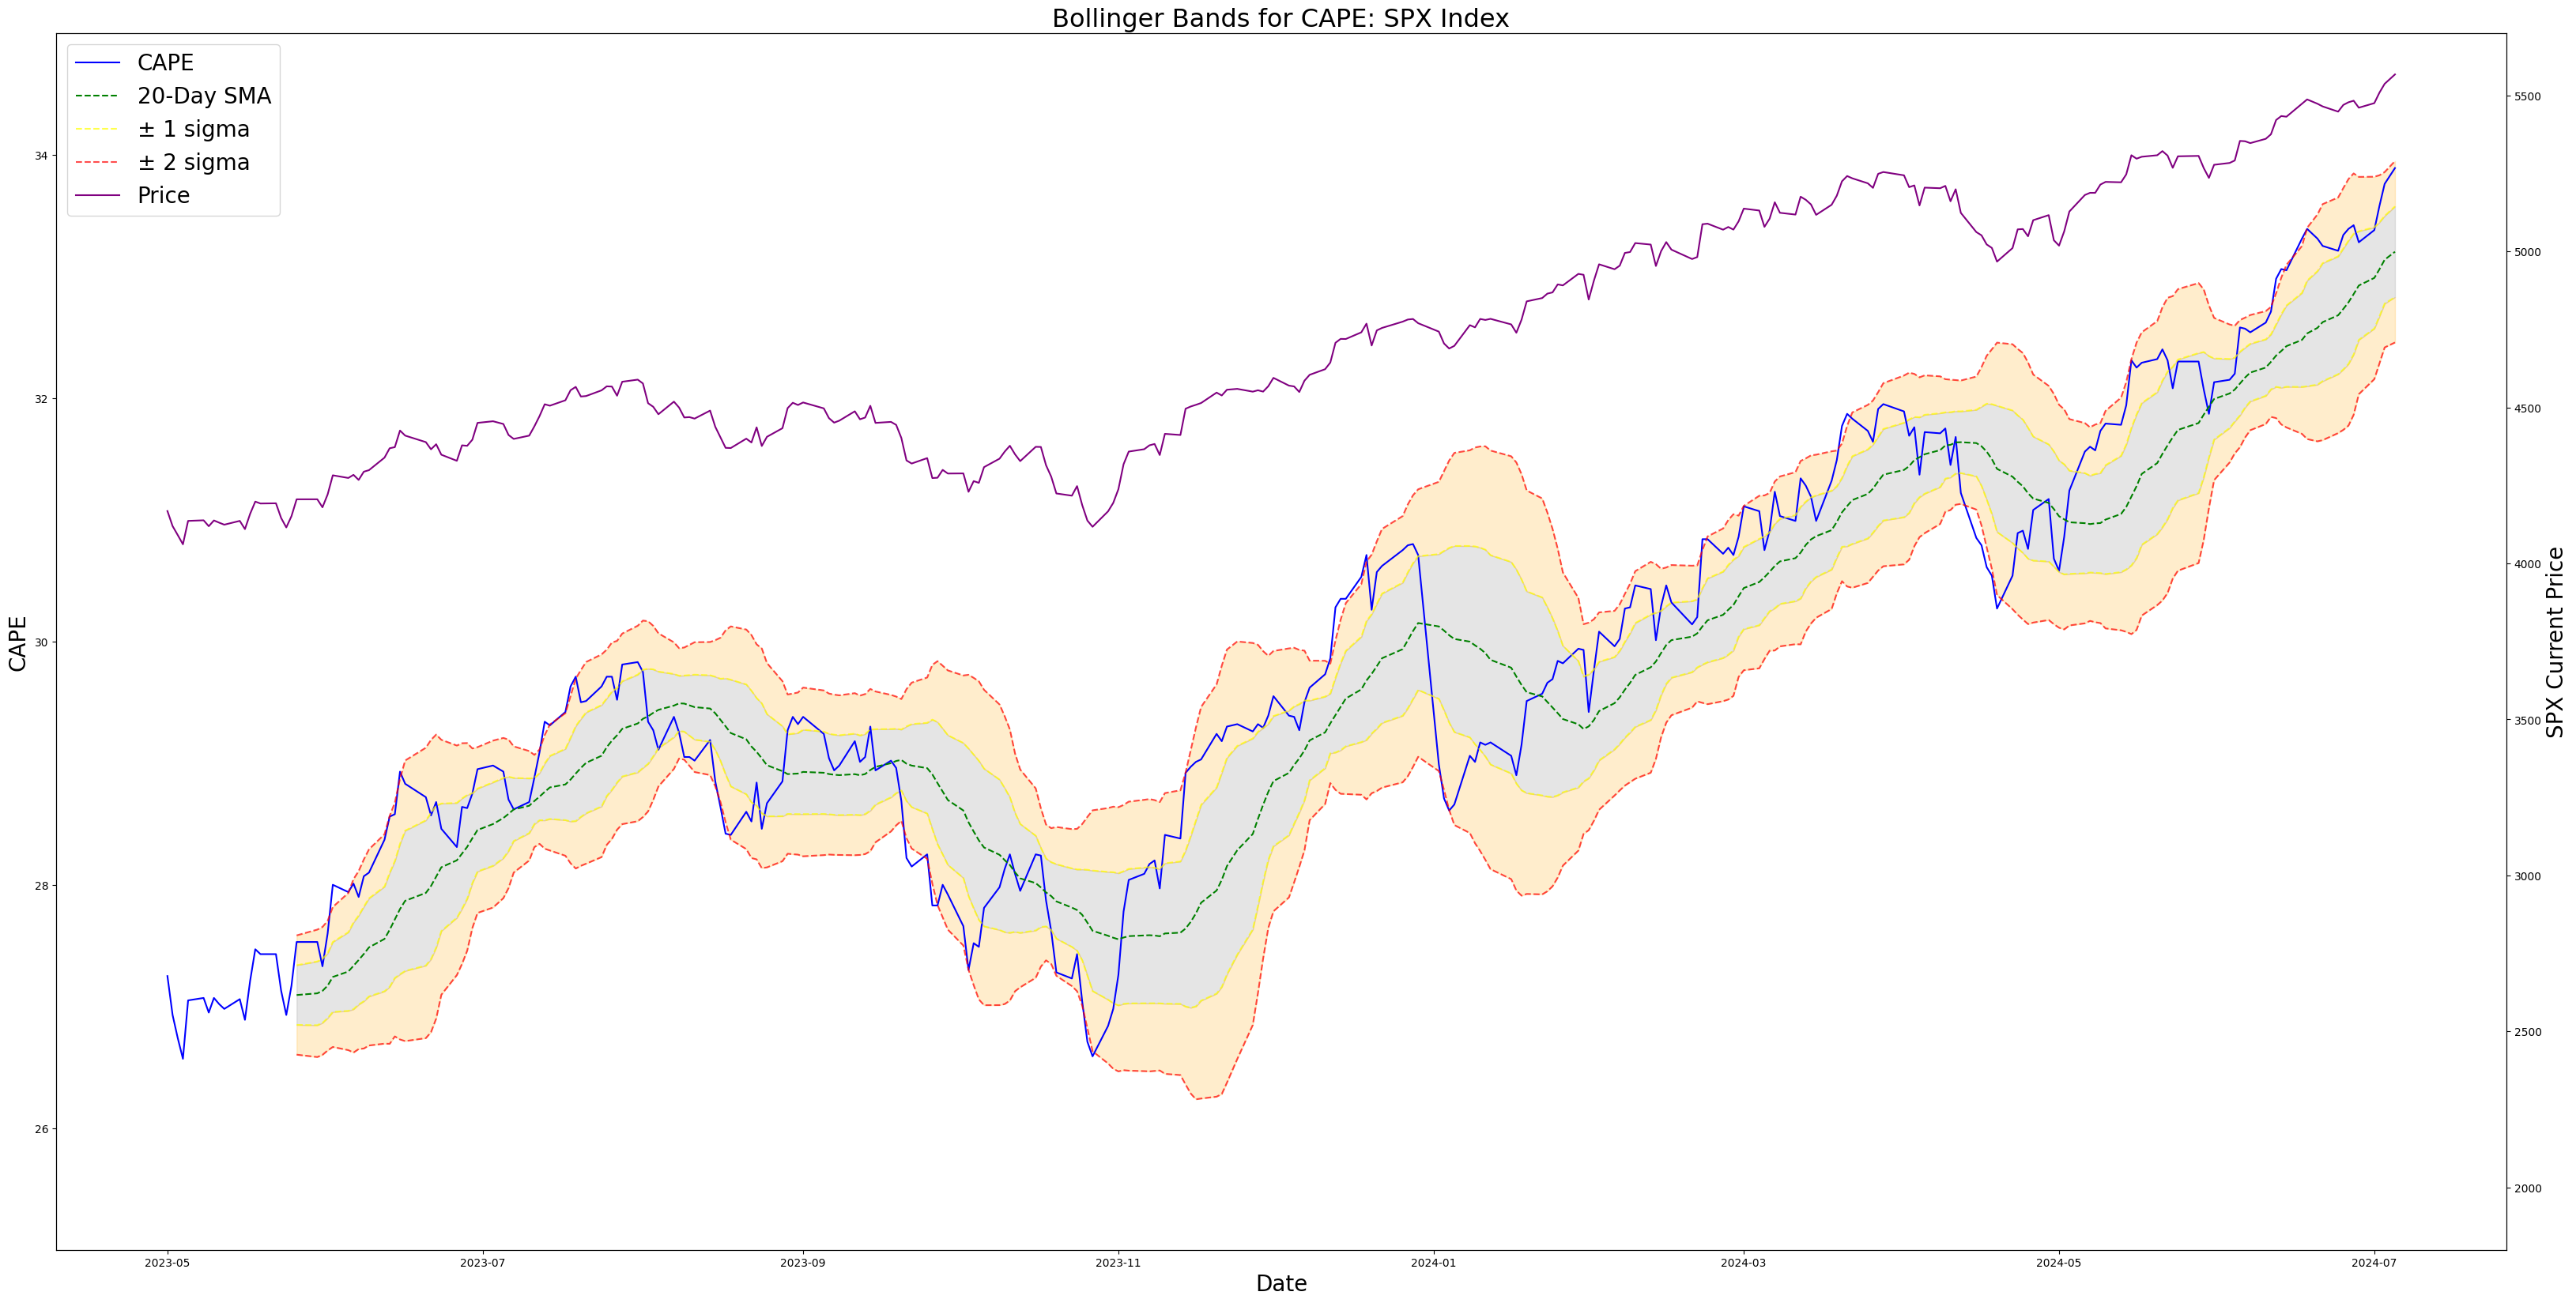

In [ ]:
fig, ax1 = plt.subplots(figsize = (40,20))

ax1.plot(cape.index, cape['CAPE'], label = 'CAPE', color = 'blue')
ax1.plot(cape.index, cape['sma_20'], label = '20-Day SMA', color = 'green', linestyle='--')
ax1.plot (cape.index, cape['upper_1'], label = '\u00B1 1 sigma', linestyle = '--', color='yellow', alpha=0.7)
ax1.plot (cape.index, cape['upper_2'], label = '\u00B1 2 sigma', linestyle = '--', color='red', alpha=0.7)
ax1.plot (cape.index, cape['lower_1'], linestyle = '--', color='yellow', alpha=0.7)
ax1.plot (cape.index, cape['lower_2'], linestyle = '--', color='red', alpha=0.7)
ax1.fill_between(cape.index, cape['upper_1'], cape['lower_1'], color='gray', alpha = 0.2)
ax1.fill_between(cape.index, cape['upper_2'], cape['upper_1'], color = 'orange', alpha=0.2)
ax1.fill_between(cape.index, cape['lower_2'], cape['lower_1'], color = 'orange', alpha=0.2)

ax1.set_xlabel('Date', fontsize = 20)
ax1.set_ylabel('CAPE', fontsize = 20)
ax1.set_title('Bollinger Bands for CAPE: SPX Index', fontsize = 23)

ax2 = ax1.twinx()
ax2.plot(cape.index, cape['Current_Price'], label='Price', color = 'purple')
ax2.set_ylabel('SPX Current Price', fontsize = 20)

ax1.set_ylim(25, 35)
ax2.set_ylim(1800,5700)

lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
ax1.legend(lines_1 + lines_2, labels_1+labels_2, loc='upper left', fontsize=20)

plt.show()

In [ ]:
lowest = cape.loc[cape["CAPE"]<=cape["lower_2"]]
lowest

,Current_Price,CAPE,sma_20,std_20,lower_1,upper_1,upper_2,lower_2
Date,,,,,,,,
2023-08-16,4404.33,28.64,29.3560,0.337130,29.018870,29.693130,30.030261,28.681739
2023-08-17,4370.36,28.42,29.3020,0.394470,28.907530,29.696470,30.090939,28.513061
2023-09-21,4330.00,28.22,28.9950,0.306500,28.688500,29.301500,29.608000,28.382000
2023-09-22,4320.06,28.15,28.9795,0.340889,28.638611,29.320389,29.661277,28.297723
2023-09-26,4273.53,27.83,28.9075,0.449864,28.457636,29.357364,29.807228,28.007772
2023-09-27,4274.51,27.83,28.8355,0.501109,28.334391,29.336609,29.837718,27.833282
2023-10-03,4229.45,27.30,28.5135,0.606190,27.907310,29.119690,29.725880,27.301120
2023-10-26,4137.23,26.71,27.6885,0.434781,27.253719,28.123281,28.558062,26.818938
2023-10-27,4117.37,26.59,27.6220,0.495045,27.126955,28.117045,28.612090,26.631910


In [ ]:
highest = cape.loc[cape["CAPE"]>=cape["upper_2"]]
highest

,Current_Price,CAPE,sma_20,std_20,lower_1,upper_1,upper_2,lower_2
Date,,,,,,,,
2023-06-02,4282.37,28.00,27.2425,0.287583,26.954917,27.530083,27.817666,26.667334
2023-06-05,4273.79,27.94,27.2870,0.322916,26.964084,27.609916,27.932832,26.641168
2023-06-15,4425.84,28.93,27.8005,0.535895,27.264605,28.336395,28.872291,26.728709
2023-07-13,4510.04,29.34,28.7635,0.233583,28.529917,28.997083,29.230665,28.296335
2023-07-17,4522.79,29.42,28.8245,0.292943,28.531557,29.117443,29.410386,28.238614
2023-07-18,4554.98,29.63,28.8645,0.343917,28.520583,29.208417,29.552333,28.176667
2023-07-19,4565.72,29.71,28.9140,0.390161,28.523839,29.304161,29.694321,28.133679
2023-12-12,4643.70,29.86,29.3265,0.245341,29.081159,29.571841,29.817183,28.835817
2023-12-13,4707.09,30.28,29.3945,0.307374,29.087126,29.701874,30.009248,28.779752


In [ ]:
lows = pd.merge(too_low, lowest,how='outer', left_index = True, right_index = True, suffixes = ('_df1', '_df2'))
lows["Current_Price"]= lows[["Current_Price_df1", "Current_Price_df2"]].mean(axis=1, skipna=True)
lows.drop(columns = ["Current_Price_df1", "Current_Price_df2"], inplace = True)
lows

,PER,sma_20_df1,std_20_df1,lower_1_df1,upper_1_df1,upper_2_df1,lower_2_df1,CAPE,sma_20_df2,std_20_df2,lower_1_df2,upper_1_df2,upper_2_df2,lower_2_df2,Current_Price
Date,,,,,,,,,,,,,,,
2023-08-16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28.64,29.3560,0.337130,29.018870,29.693130,30.030261,28.681739,4404.33
2023-08-17,20.1441,20.868965,0.346239,20.522726,21.215204,21.561444,20.176486,28.42,29.3020,0.394470,28.907530,29.696470,30.090939,28.513061,4370.36
2023-09-21,19.9767,20.493630,0.225994,20.267636,20.719624,20.945618,20.041642,28.22,28.9950,0.306500,28.688500,29.301500,29.608000,28.382000,4330.00
2023-09-22,19.9367,20.487890,0.238904,20.248986,20.726794,20.965697,20.010083,28.15,28.9795,0.340889,28.638611,29.320389,29.661277,28.297723,4320.06
2023-09-26,19.7202,20.451900,0.301822,20.150078,20.753722,21.055544,19.848256,27.83,28.9075,0.449864,28.457636,29.357364,29.807228,28.007772,4273.53
2023-09-27,19.7149,20.409975,0.342479,20.067496,20.752454,21.094933,19.725017,27.83,28.8355,0.501109,28.334391,29.336609,29.837718,27.833282,4274.51
2023-10-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27.30,28.5135,0.606190,27.907310,29.119690,29.725880,27.301120,4229.45
2023-10-26,19.1204,19.785190,0.302410,19.482780,20.087600,20.390011,19.180369,26.71,27.6885,0.434781,27.253719,28.123281,28.558062,26.818938,4137.23
2023-10-27,19.0223,19.750875,0.347182,19.403693,20.098057,20.445239,19.056511,26.59,27.6220,0.495045,27.126955,28.117045,28.612090,26.631910,4117.37


In [ ]:
lows = lows[["PER","CAPE", "Current_Price"]]
lows

,PER,CAPE,Current_Price
Date,,,
2023-08-16,NaN,28.64,4404.33
2023-08-17,20.1441,28.42,4370.36
2023-09-21,19.9767,28.22,4330.00
2023-09-22,19.9367,28.15,4320.06
2023-09-26,19.7202,27.83,4273.53
2023-09-27,19.7149,27.83,4274.51
2023-10-03,NaN,27.30,4229.45
2023-10-26,19.1204,26.71,4137.23
2023-10-27,19.0223,26.59,4117.37


In [ ]:
highs = pd.merge(too_high, highest,how='outer', left_index = True, right_index = True, suffixes = ('_df1', '_df2'))
highs["Current_Price"]= highs[["Current_Price_df1", "Current_Price_df2"]].mean(axis=1, skipna=True)
highs.drop(columns = ["Current_Price_df1", "Current_Price_df2"], inplace = True)
highs

,PER,sma_20_df1,std_20_df1,lower_1_df1,upper_1_df1,upper_2_df1,lower_2_df1,CAPE,sma_20_df2,std_20_df2,lower_1_df2,upper_1_df2,upper_2_df2,lower_2_df2,Current_Price
Date,,,,,,,,,,,,,,,
2023-06-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28.00,27.2425,0.287583,26.954917,27.530083,27.817666,26.667334,4282.37
2023-06-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27.94,27.2870,0.322916,26.964084,27.609916,27.932832,26.641168,4273.79
2023-06-15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28.93,27.8005,0.535895,27.264605,28.336395,28.872291,26.728709,4425.84
2023-07-13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29.34,28.7635,0.233583,28.529917,28.997083,29.230665,28.296335,4510.04
2023-07-17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29.42,28.8245,0.292943,28.531557,29.117443,29.410386,28.238614,4522.79
2023-07-18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29.63,28.8645,0.343917,28.520583,29.208417,29.552333,28.176667,4554.98
2023-07-19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29.71,28.9140,0.390161,28.523839,29.304161,29.694321,28.133679,4565.72
2023-12-12,21.5020,21.100585,0.167452,20.933133,21.268037,21.435489,20.765681,29.86,29.3265,0.245341,29.081159,29.571841,29.817183,28.835817,4643.70
2023-12-13,21.8015,21.147710,0.220199,20.927511,21.367909,21.588109,20.707311,30.28,29.3945,0.307374,29.087126,29.701874,30.009248,28.779752,4707.09


In [ ]:
highs = highs[["PER","CAPE", "Current_Price"]]
highs

,PER,CAPE,Current_Price
Date,,,
2023-06-02,NaN,28.00,4282.37
2023-06-05,NaN,27.94,4273.79
2023-06-15,NaN,28.93,4425.84
2023-07-13,NaN,29.34,4510.04
2023-07-17,NaN,29.42,4522.79
2023-07-18,NaN,29.63,4554.98
2023-07-19,NaN,29.71,4565.72
2023-12-12,21.5020,29.86,4643.70
2023-12-13,21.8015,30.28,4707.09


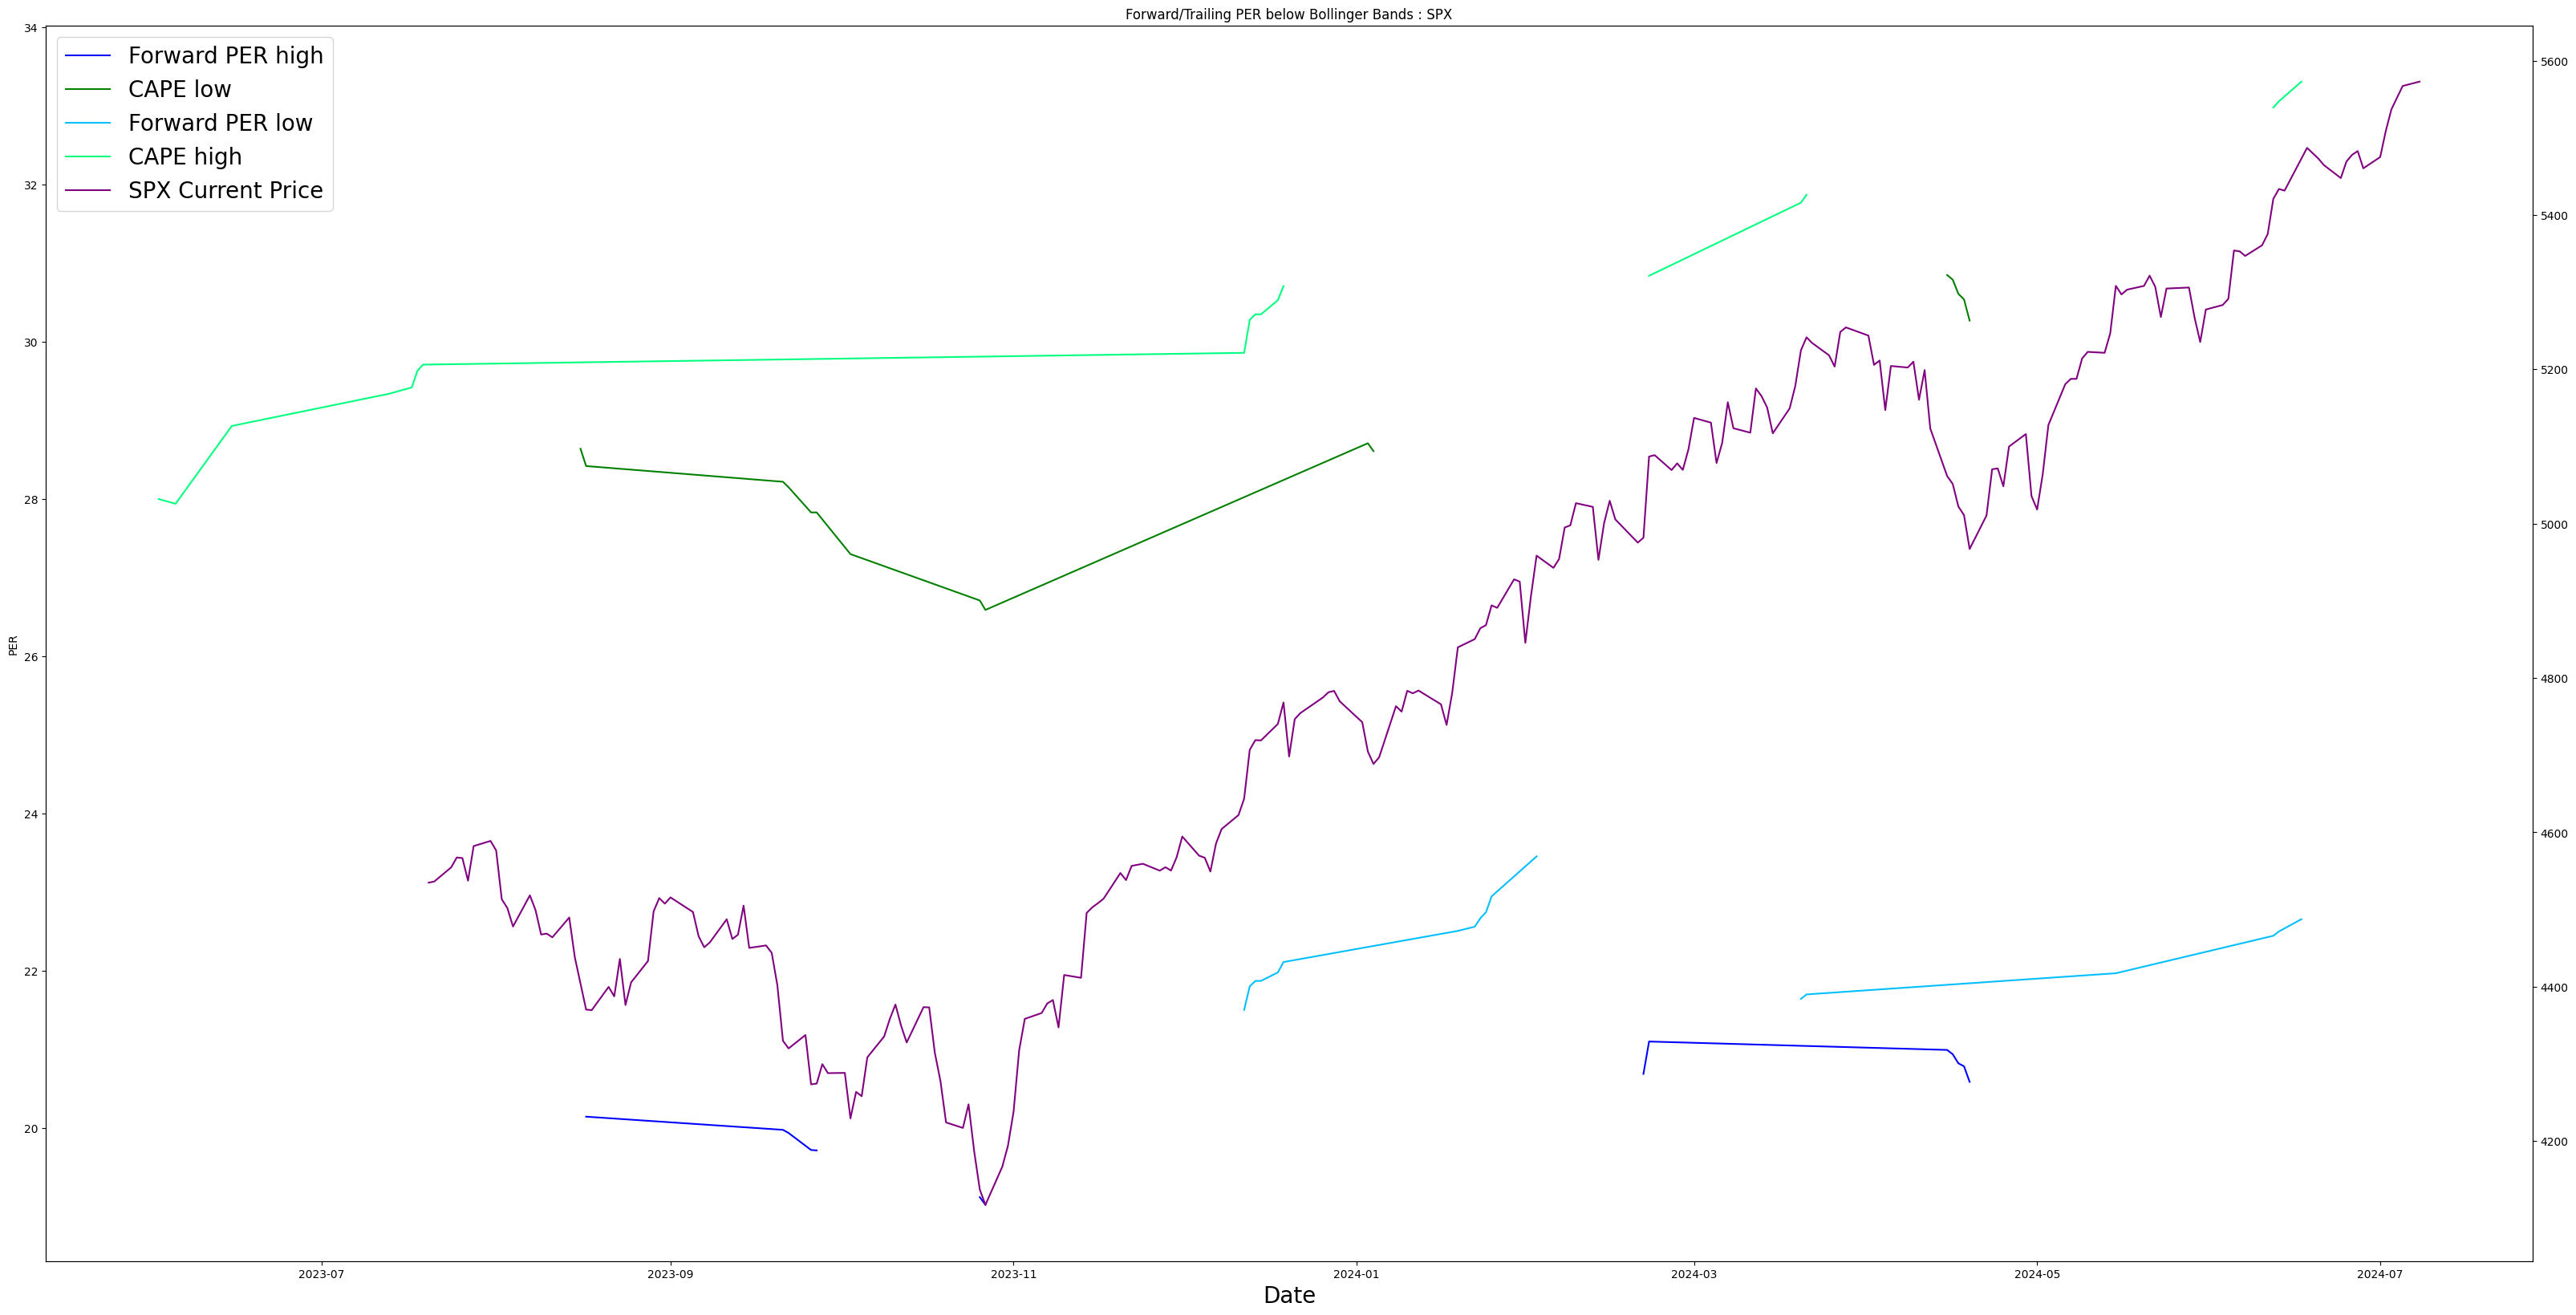

In [ ]:
fig, ax1 = plt.subplots(figsize = (40,20))

ax1.plot(lows.index, lows["PER"], label = "Forward PER high", color = 'blue')
ax1.plot(lows.index, lows["CAPE"], label = "CAPE low", color = 'green')
ax1.plot(highs.index, highs["PER"], label="Forward PER low", color = 'deepskyblue')
ax1.plot(highs.index, highs["CAPE"], label = "CAPE high", color = "springgreen")

ax1.set_xlabel("Date", fontsize = 20)
ax1.set_ylabel("PER")
ax1.set_title("Forward/Trailing PER below Bollinger Bands : SPX")

ax2 = ax1.twinx()
ax2.plot(spx.index, spx["Current_Price"], label = "SPX Current Price", color = 'purple')

lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2, = ax2.get_legend_handles_labels()
ax1.legend(lines_1 + lines_2, labels_1 + labels_2, loc='upper left', fontsize = 20)

plt.show()

In [ ]:
spx

,Current_Price,PER,sma_20,std_20,lower_1,upper_1,upper_2,lower_2
Date,,,,,,,,
2023-07-20,4534.87,21.1322,NaN,NaN,NaN,NaN,NaN,NaN
2023-07-21,4536.34,21.1400,NaN,NaN,NaN,NaN,NaN,NaN
2023-07-24,4554.64,21.2444,NaN,NaN,NaN,NaN,NaN,NaN
2023-07-25,4567.46,21.2746,NaN,NaN,NaN,NaN,NaN,NaN
2023-07-26,4566.75,21.2420,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
2024-07-01,5475.09,22.6673,22.417670,0.280773,22.136897,22.698443,22.979217,21.856123
2024-07-02,5509.01,22.8116,22.465680,0.260188,22.205492,22.725868,22.986057,21.945303
2024-07-03,5537.02,22.9301,22.518000,0.241541,22.276459,22.759541,23.001082,22.034918


In [ ]:
cape

,Current_Price,CAPE,sma_20,std_20,lower_1,upper_1,upper_2,lower_2
Date,,,,,,,,
2023-05-01,4167.87,27.25,NaN,NaN,NaN,NaN,NaN,NaN
2023-05-02,4119.58,26.93,NaN,NaN,NaN,NaN,NaN,NaN
2023-05-03,4090.75,26.74,NaN,NaN,NaN,NaN,NaN,NaN
2023-05-04,4061.22,26.57,NaN,NaN,NaN,NaN,NaN,NaN
2023-05-05,4136.25,27.05,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
2024-06-28,5460.48,33.28,32.9245,0.446430,32.478070,33.370930,33.817360,32.031640
2024-07-01,5475.09,33.38,32.9870,0.415795,32.571205,33.402795,33.818589,32.155411
2024-07-02,5509.01,33.58,33.0585,0.386186,32.672314,33.444686,33.830872,32.286128


In [ ]:
#final df
dfdf = spx.join(cape, how='outer', lsuffix='_forward', rsuffix='_trail')

dfdf["Current_Price"] = dfdf[["Current_Price_forward","Current_Price_trail"]].mean(axis = 1, skipna = True)
dfdf.drop(columns = ["Current_Price_forward", "Current_Price_trail"], inplace = True)

dfdf

,PER,sma_20_forward,std_20_forward,lower_1_forward,upper_1_forward,upper_2_forward,lower_2_forward,CAPE,sma_20_trail,std_20_trail,lower_1_trail,upper_1_trail,upper_2_trail,lower_2_trail,Current_Price
Date,,,,,,,,,,,,,,,
2023-05-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27.25,NaN,NaN,NaN,NaN,NaN,NaN,4167.87
2023-05-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26.93,NaN,NaN,NaN,NaN,NaN,NaN,4119.58
2023-05-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26.74,NaN,NaN,NaN,NaN,NaN,NaN,4090.75
2023-05-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26.57,NaN,NaN,NaN,NaN,NaN,NaN,4061.22
2023-05-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27.05,NaN,NaN,NaN,NaN,NaN,NaN,4136.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-07-01,22.6673,22.417670,0.280773,22.136897,22.698443,22.979217,21.856123,33.38,32.9870,0.415795,32.571205,33.402795,33.818589,32.155411,5475.09
2024-07-02,22.8116,22.465680,0.260188,22.205492,22.725868,22.986057,21.945303,33.58,33.0585,0.386186,32.672314,33.444686,33.830872,32.286128,5509.01
2024-07-03,22.9301,22.518000,0.241541,22.276459,22.759541,23.001082,22.034918,33.76,33.1365,0.360340,32.776160,33.496840,33.857180,32.415820,5537.02


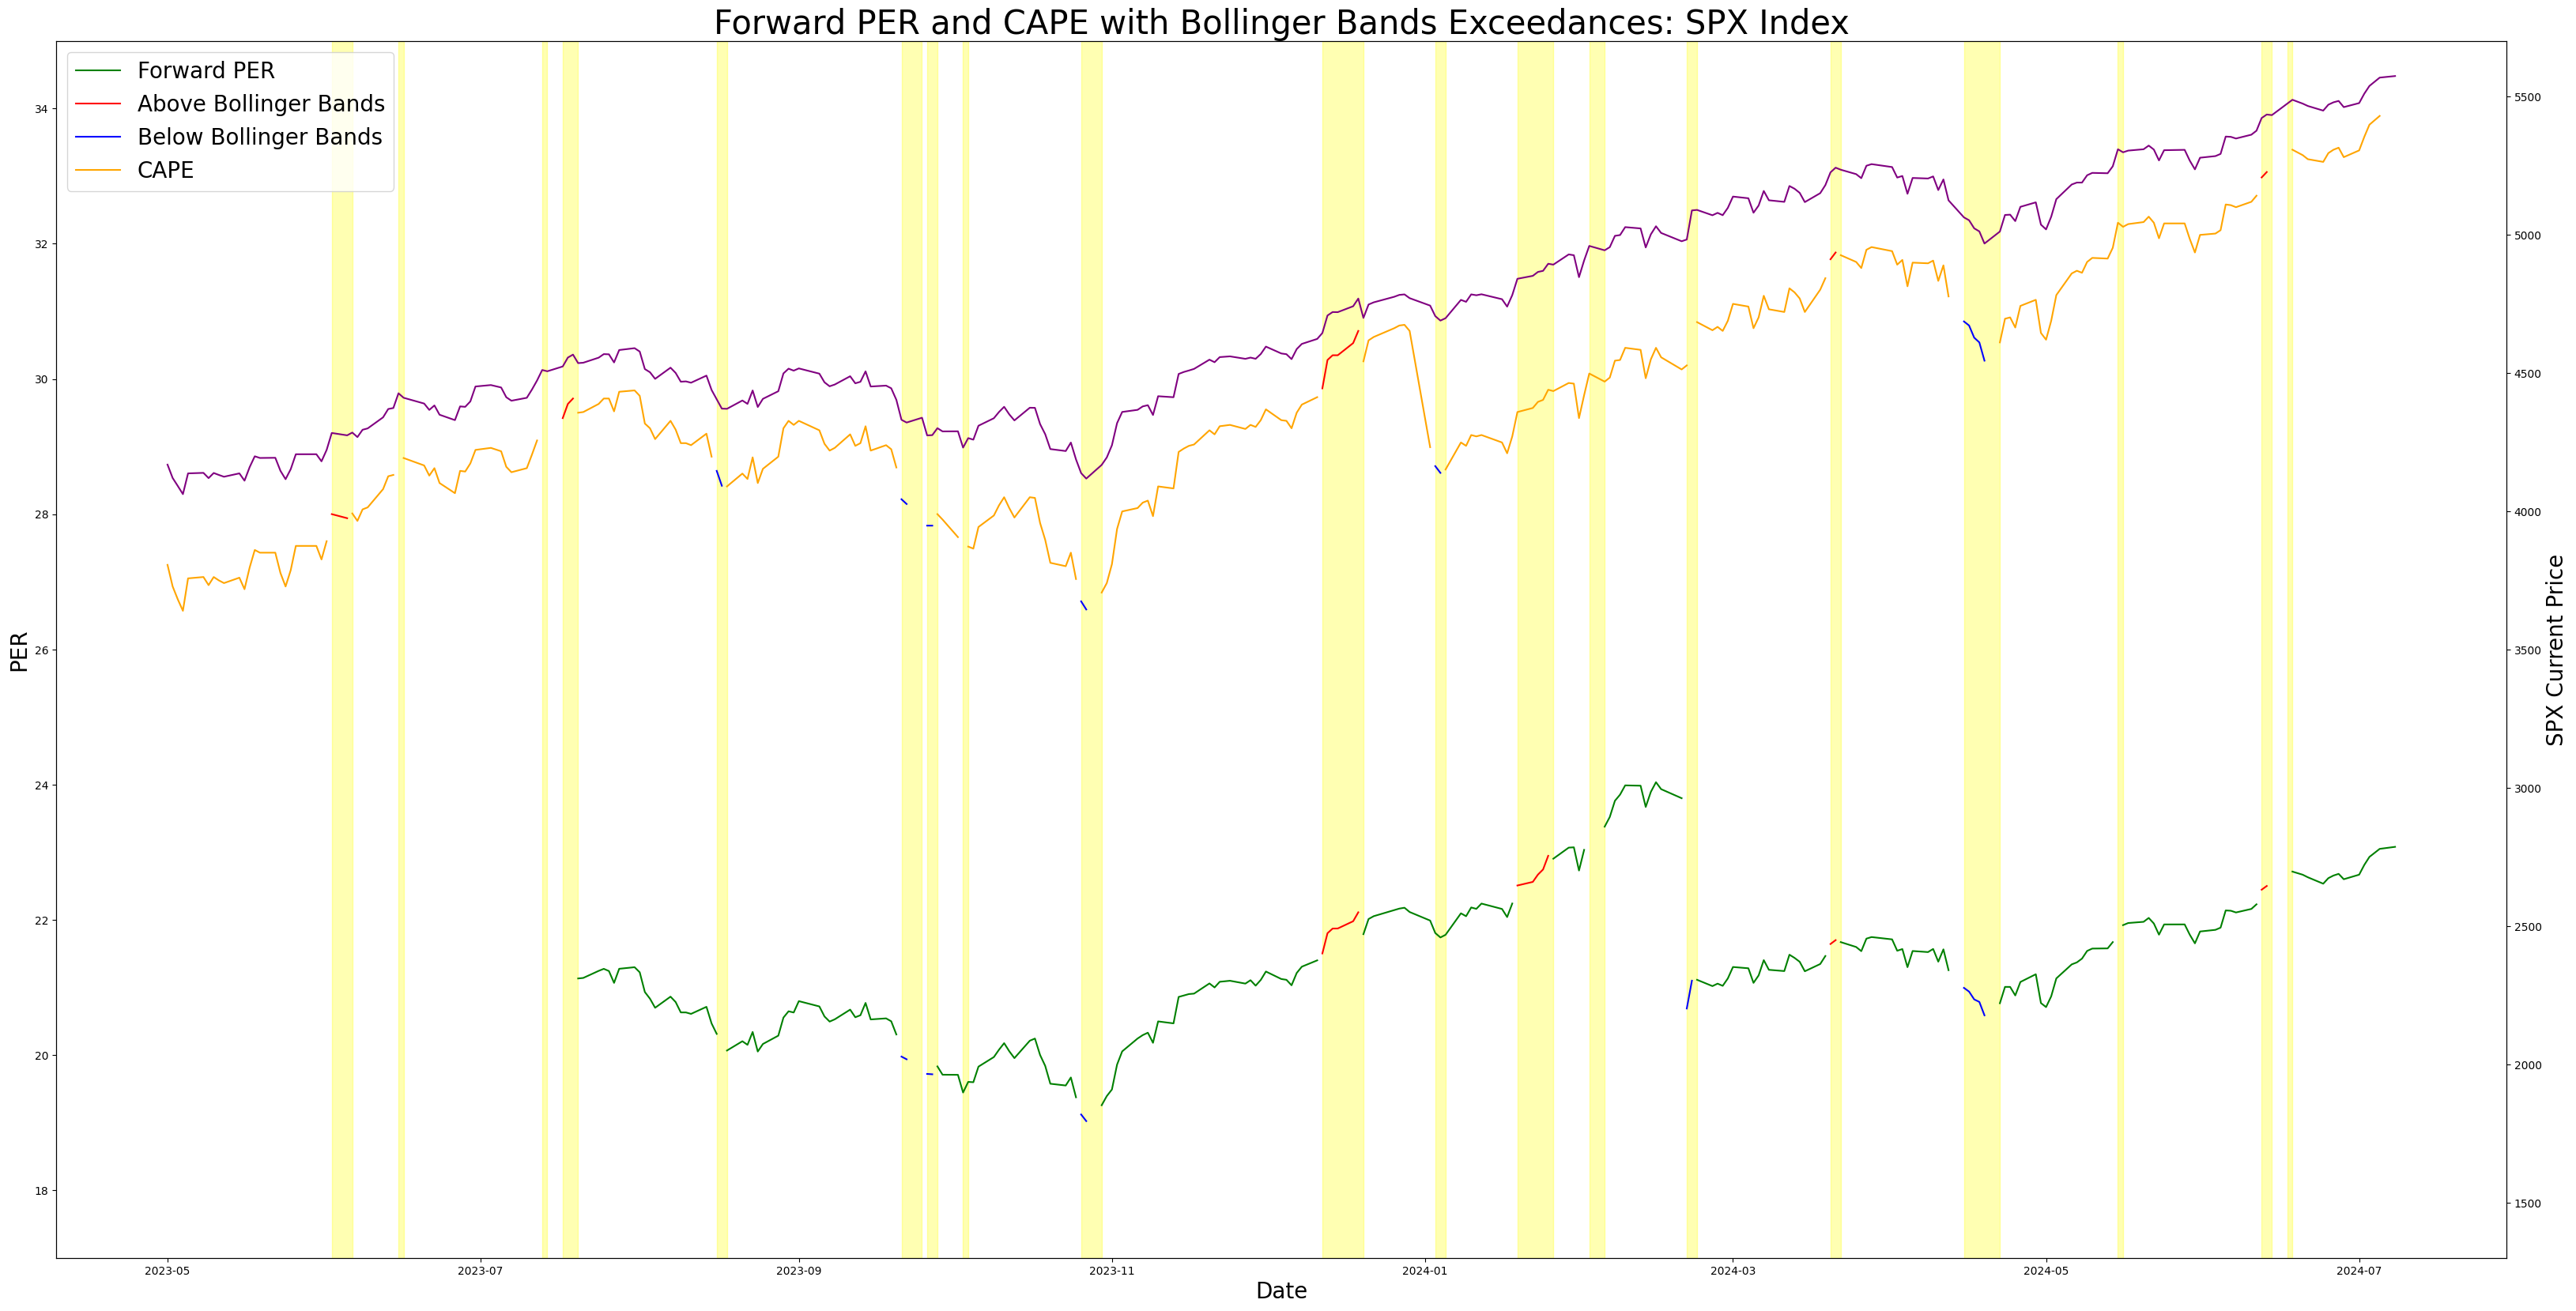

In [ ]:
#final graphic
fig, ax1 = plt.subplots(figsize=(40,20))


forward_highs = dfdf["PER"]>=dfdf["upper_2_forward"]
forward_lows = dfdf["PER"]<=dfdf["lower_2_forward"]
forward_within = ~(forward_highs|forward_lows)

ax1.plot(dfdf.index, dfdf["PER"].where(forward_within), color = 'green', label = 'Forward PER')
ax1.plot(dfdf.index, dfdf["PER"].where(forward_highs), color = 'red', linestyle = 'solid', label = 'Above Bollinger Bands')
ax1.plot(dfdf.index, dfdf["PER"].where(forward_lows), color = 'blue', linestyle = 'solid', label='Below Bollinger Bands')

trail_highs = dfdf["CAPE"]>=dfdf["upper_2_trail"]
trail_lows = dfdf["CAPE"]<=dfdf["lower_2_trail"]
trail_within = ~(trail_highs|trail_lows)

ax1.plot(dfdf.index, dfdf["CAPE"].where(trail_within), color = 'orange', label = 'CAPE')
ax1.plot(dfdf.index, dfdf["CAPE"].where(trail_highs), color = 'red', linestyle='solid')
ax1.plot(dfdf.index, dfdf["CAPE"].where(trail_lows), color='blue', linestyle = 'solid')

highlight = (forward_highs | forward_lows | trail_highs | trail_lows)

highlight_start = None
for i in range(len(highlight)):
    if highlight.iloc[i] and highlight_start is None:
        highlight_start = dfdf.index[i]
    elif not highlight.iloc[i] and highlight_start is not None:
        ax1.axvspan(highlight_start, dfdf.index[i], color='yellow', alpha=0.3)
        highlight_start = None

if highlight_start is not None:
    ax1.axvspan(highlight_start, combined_df.index[-1], color='yellow', alpha=0.3)


ax2 = ax1.twinx()
ax2.plot(dfdf.index, dfdf["Current_Price"], label = 'Price', color = 'purple')
ax2.set_ylabel("SPX Current Price", fontsize=20)

ax1.set_xlabel('Date', fontsize=20)
ax1.set_ylabel("PER",fontsize=20)
ax1.set_title("Forward PER and CAPE with Bollinger Bands Exceedances: SPX Index", fontsize = '30')
ax1.legend(loc='upper left', fontsize=20)

ax1.set_ylim(17, 35)
ax2.set_ylim(1300,5700)

plt.show()

